# 1. Install Dependencies

In [39]:
!pip install nemo_toolkit[asr] torchaudio scikit-learn matplotlib numpy scipy



# 2. Import Libraries

In [23]:
import nemo.collections.asr as nemo_asr
import torch
import torchaudio
from sklearn.metrics.pairwise import cosine_similarity


# 3. Load Pretrained Models

In [24]:
# SpeakerNet
speakernet = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained(model_name="speakerverification_speakernet")

# TitaNet-L
titanet = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained(model_name="titanet_large")

# ECAPA-TDNN
ecapa = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained(model_name="ecapa_tdnn")


[NeMo I 2025-03-18 07:12:27 nemo_logging:393] Found existing object /root/.cache/torch/NeMo/NeMo_2.2.0/speakerverification_speakernet/a8330fa516557b963a89ccbf0fcbe2f2/speakerverification_speakernet.nemo.
[NeMo I 2025-03-18 07:12:27 nemo_logging:393] Re-using file from: /root/.cache/torch/NeMo/NeMo_2.2.0/speakerverification_speakernet/a8330fa516557b963a89ccbf0fcbe2f2/speakerverification_speakernet.nemo
[NeMo I 2025-03-18 07:12:27 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-03-18 07:12:27 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /ws/manifests/raid/combined/train_manifest.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    time_length: 8
    augmentor:
      noise:
        manifest_path: /ws/manifests/raid/musan/musan_music_noise_manifest_dur8.json
        prob: 0.2
        min_snr_db: 5
        max_snr_db: 15
    num_workers: 4
    
[NeMo W 2025-03-18 07:12:27 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: /ws/manifests/raid/voxceleb/small_manifest.json
    sample_rate: 16000
    labels: null
    b

[NeMo I 2025-03-18 07:12:27 nemo_logging:393] PADDING: 16
[NeMo I 2025-03-18 07:12:28 nemo_logging:393] Model EncDecSpeakerLabelModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.2.0/speakerverification_speakernet/a8330fa516557b963a89ccbf0fcbe2f2/speakerverification_speakernet.nemo.
[NeMo I 2025-03-18 07:12:28 nemo_logging:393] Found existing object /root/.cache/torch/NeMo/NeMo_2.2.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo.
[NeMo I 2025-03-18 07:12:28 nemo_logging:393] Re-using file from: /root/.cache/torch/NeMo/NeMo_2.2.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo
[NeMo I 2025-03-18 07:12:28 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-03-18 07:12:28 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2025-03-18 07:12:28 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data

[NeMo I 2025-03-18 07:12:28 nemo_logging:393] PADDING: 16
[NeMo I 2025-03-18 07:12:29 nemo_logging:393] Model EncDecSpeakerLabelModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.2.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo.
[NeMo I 2025-03-18 07:12:29 nemo_logging:393] Found existing object /root/.cache/torch/NeMo/NeMo_2.2.0/ecapa_tdnn/3e0c5c4731b176aeb70c29a74d800c81/ecapa_tdnn.nemo.
[NeMo I 2025-03-18 07:12:29 nemo_logging:393] Re-using file from: /root/.cache/torch/NeMo/NeMo_2.2.0/ecapa_tdnn/3e0c5c4731b176aeb70c29a74d800c81/ecapa_tdnn.nemo
[NeMo I 2025-03-18 07:12:29 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-03-18 07:12:30 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    time_length: 3
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2025-03-18 07:12:30 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validati

[NeMo I 2025-03-18 07:12:30 nemo_logging:393] PADDING: 16
[NeMo I 2025-03-18 07:12:31 nemo_logging:393] Model EncDecSpeakerLabelModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.2.0/ecapa_tdnn/3e0c5c4731b176aeb70c29a74d800c81/ecapa_tdnn.nemo.


# 4. Upload Real and Fake Speech

In [27]:
from google.colab import files
uploaded = files.upload()  # Upload real_speech.wav & fake_speech.wav


Saving fake_vctk_audio.zip to fake_vctk_audio.zip
Saving test-clean-wav-20250318T071405Z-001.zip to test-clean-wav-20250318T071405Z-001.zip


In [30]:
!unzip test-clean-wav-20250318T071405Z-001.zip -d /content/real_audio
!unzip fake_vctk_audio.zip -d /content/fake_audio

Archive:  test-clean-wav-20250318T071405Z-001.zip
  inflating: /content/real_audio/test-clean-wav/2830-3980-0003.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0002.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0007.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0004.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0000.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0001.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0005.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0009.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0014.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0016.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0011.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0019.wav  
  inflating: /content/real_audio/test-clean-wav/2830-3980-0013.wav  
  inflating: /content/real_audio/test-clean-wav/2830-

# 5. Define Function to Compute Similarity

In [31]:
def compute_similarity(model, audio1_path, audio2_path):
    import torchaudio
    from sklearn.metrics.pairwise import cosine_similarity
    import torch

    # Load audio
    audio1, sr = torchaudio.load(audio1_path)
    audio2, sr = torchaudio.load(audio2_path)

    # Ensure correct shape (batch, time)
    if len(audio1.shape) == 1:
        audio1 = audio1.unsqueeze(0)
    if len(audio2.shape) == 1:
        audio2 = audio2.unsqueeze(0)

    # Move to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    audio1 = audio1.to(device)
    audio2 = audio2.to(device)

    # Set model to eval mode
    model.eval()

    # Forward pass to get embeddings
    with torch.no_grad():
        _, embed1 = model(input_signal=audio1, input_signal_length=torch.tensor([audio1.shape[1]]).to(device))
        _, embed2 = model(input_signal=audio2, input_signal_length=torch.tensor([audio2.shape[1]]).to(device))

    # Move back to CPU and calculate cosine similarity
    embed1 = embed1.cpu().numpy()
    embed2 = embed2.cpu().numpy()
    sim = cosine_similarity(embed1, embed2)

    return sim[0][0]


# 6. Run Verification

In [40]:
import os

# Paths to real and fake audio folders
real_audio_folder = '/content/real_audio/test-clean-wav'
fake_audio_folder = '/content/fake_audio/fake_vctk_audio'

# Lists of audio filenames (ensure they are sorted to match correctly)
real_audio_files = sorted(os.listdir(real_audio_folder))
fake_audio_files = sorted(os.listdir(fake_audio_folder))

# Initialize lists to store similarity scores
speakernet_scores = []
titanet_scores = []
ecapa_scores = []

# Loop through each pair of real and fake audio files
for i in range(len(real_audio_files)):
    real_audio = os.path.join(real_audio_folder, real_audio_files[i])
    fake_audio = os.path.join(fake_audio_folder, fake_audio_files[i])

    print(f"--- Test Pair {i+1} ---")
    print(f"Real: {real_audio_files[i]} vs Fake: {fake_audio_files[i]}")

    # Compute similarity scores using the provided compute_similarity function
    sn_score = compute_similarity(speakernet, real_audio, fake_audio)
    ti_score = compute_similarity(titanet, real_audio, fake_audio)
    ec_score = compute_similarity(ecapa, real_audio, fake_audio)

    # Append scores to respective lists
    speakernet_scores.append(sn_score)
    titanet_scores.append(ti_score)
    ecapa_scores.append(ec_score)

    # Print similarity scores
    print("SpeakerNet Similarity:", sn_score)
    print("TitaNet-L Similarity:", ti_score)
    print("ECAPA-TDNN Similarity:", ec_score)
    print("-------------------------\n")


--- Test Pair 1 ---
Real: 2830-3980-0000.wav vs Fake: fake_speech_vctk_0000.wav
SpeakerNet Similarity: 0.120342605
TitaNet-L Similarity: 0.073299915
ECAPA-TDNN Similarity: 0.06483072
-------------------------

--- Test Pair 2 ---
Real: 2830-3980-0001.wav vs Fake: fake_speech_vctk_0001.wav
SpeakerNet Similarity: -0.044888932
TitaNet-L Similarity: 0.12108554
ECAPA-TDNN Similarity: 0.068056166
-------------------------

--- Test Pair 3 ---
Real: 2830-3980-0002.wav vs Fake: fake_speech_vctk_0002.wav
SpeakerNet Similarity: 0.18029849
TitaNet-L Similarity: 0.02755433
ECAPA-TDNN Similarity: 0.02863475
-------------------------

--- Test Pair 4 ---
Real: 2830-3980-0003.wav vs Fake: fake_speech_vctk_0003.wav
SpeakerNet Similarity: 0.0467081
TitaNet-L Similarity: 0.03419322
ECAPA-TDNN Similarity: 0.049733214
-------------------------

--- Test Pair 5 ---
Real: 2830-3980-0004.wav vs Fake: fake_speech_vctk_0004.wav
SpeakerNet Similarity: 0.16105846
TitaNet-L Similarity: 0.08013328
ECAPA-TDNN Simil

# 7. Plot

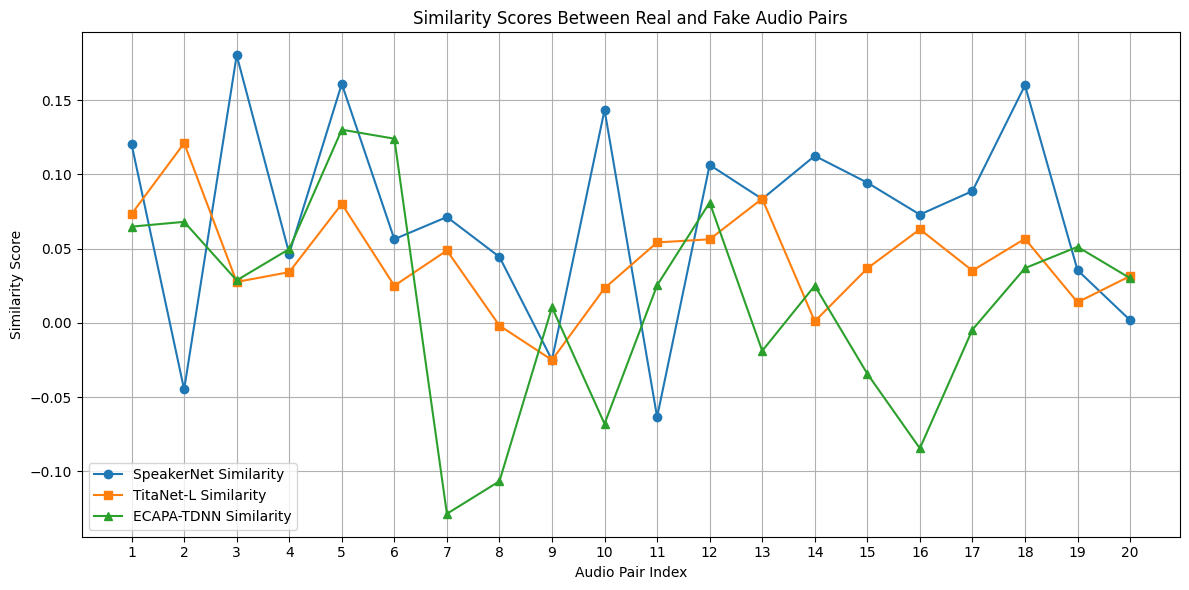

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that the number of audio pairs matches the number of computed scores
num_pairs = len(real_audio_files)
x = np.arange(1, num_pairs + 1)

# Plotting the similarity scores for each model
plt.figure(figsize=(12, 6))
plt.plot(x, speakernet_scores, label='SpeakerNet Similarity', marker='o')
plt.plot(x, titanet_scores, label='TitaNet-L Similarity', marker='s')
plt.plot(x, ecapa_scores, label='ECAPA-TDNN Similarity', marker='^')

# Adding titles and labels
plt.title('Similarity Scores Between Real and Fake Audio Pairs')
plt.xlabel('Audio Pair Index')
plt.ylabel('Similarity Score')
plt.xticks(x)  # Set x-ticks to match audio pair indices
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [37]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import os

# Paths to your folders
real_audio_folder = '/content/real_audio/test-clean-wav'
fake_audio_folder = '/content/fake_audio/fake_vctk_audio'
real_waveform_folder = '/content/real_waveform'
fake_waveform_folder = '/content/fake_waveform'

# Create folders to save waveform images
os.makedirs(real_waveform_folder, exist_ok=True)
os.makedirs(fake_waveform_folder, exist_ok=True)

# Function to plot and save waveform
def plot_and_save_waveform(file_path, save_folder):
    filename = os.path.basename(file_path).replace('.wav', '.png')
    with wave.open(file_path, 'rb') as wav_file:
        n_channels = wav_file.getnchannels()
        sampwidth = wav_file.getsampwidth()
        framerate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        audio_data = wav_file.readframes(n_frames)

        audio_signal = np.frombuffer(audio_data, dtype=np.int16)
        time = np.linspace(0, n_frames / framerate, num=n_frames)

        plt.figure(figsize=(12, 4))
        plt.plot(time, audio_signal)
        plt.title(f"Waveform of {os.path.basename(file_path)}")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.savefig(os.path.join(save_folder, filename))
        plt.close()

# Plot waveforms for real audio
real_audio_files = sorted(os.listdir(real_audio_folder))
for file_name in real_audio_files:
    file_path = os.path.join(real_audio_folder, file_name)
    plot_and_save_waveform(file_path, real_waveform_folder)

# Plot waveforms for fake audio
fake_audio_files = sorted(os.listdir(fake_audio_folder))
for file_name in fake_audio_files:
    file_path = os.path.join(fake_audio_folder, file_name)
    plot_and_save_waveform(file_path, fake_waveform_folder)

print("✅ Waveforms saved for all real and fake audio files.")


✅ Waveforms saved for all real and fake audio files.


In [38]:
import shutil

# Zip the real waveform folder
shutil.make_archive('/content/real_waveform', 'zip', '/content/real_waveform')

# Zip the fake waveform folder
shutil.make_archive('/content/fake_waveform', 'zip', '/content/fake_waveform')


'/content/fake_waveform.zip'

In [ ]:
from google.colab import files
files.download('/content/real_waveform.zip')
files.download('/content/fake_waveform.zip')
